In [83]:
import Comrade as Cmrd
import CairoMakie

# Models

* Gaussians
* Rings
* Crescents

In [80]:
mdl = Cmrd.Gaussian()

VLBISkyModels.Gaussian{Float64}()

In [81]:
mdl = Cmrd.Ring()

VLBISkyModels.Ring{Float64}()

In [84]:

mdl = Cmrd.Crescent(2.0, 1.0, 0.5, 0.2)

ModifiedModel
  base model: VLBISkyModels.AddModel(
model1: ModifiedModel
  base model: VLBISkyModels.Disk{Float64}()
  Modifiers:
    1. VLBISkyModels.Stretch{Float64}
    2. VLBISkyModels.Renormalize{Float64}
model2: ModifiedModel
  base model: VLBISkyModels.Disk{Float64}()
  Modifiers:
    1. VLBISkyModels.Stretch{Float64}
    2. VLBISkyModels.Renormalize{Float64}
    3. VLBISkyModels.Shift{Float64}
    4. VLBISkyModels.Renormalize{Float64}
)
  Modifiers:
    1. VLBISkyModels.Renormalize{Float64}

## Displaying Models

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


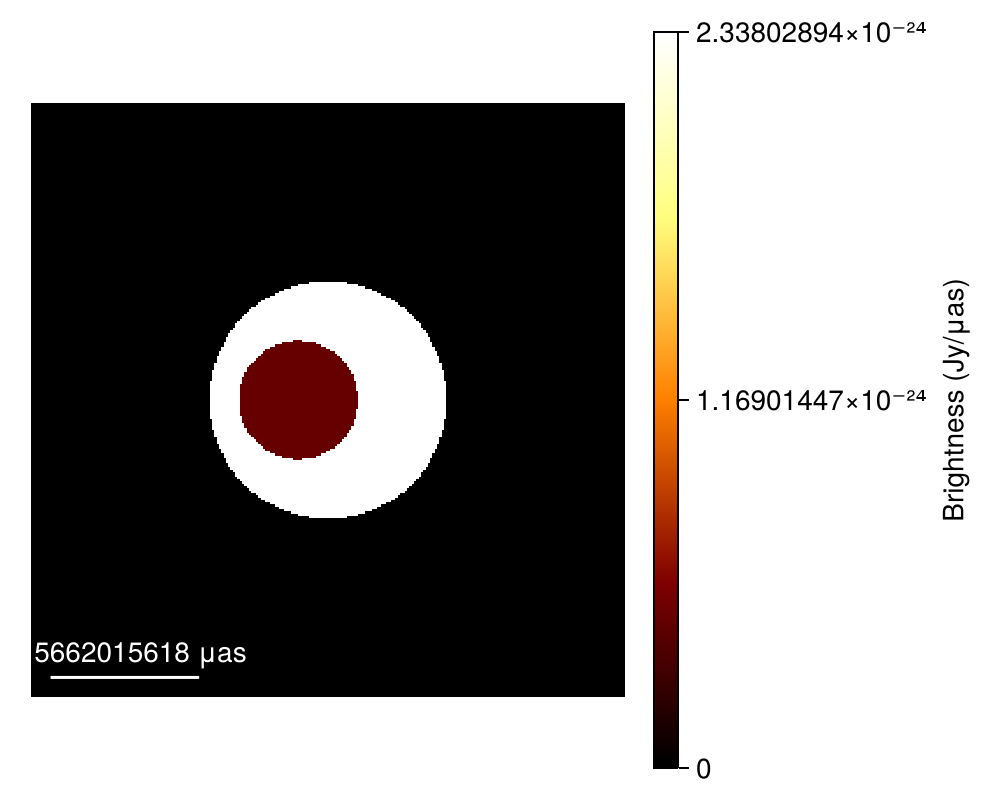

In [59]:
import CairoMakie as CM
g = Cmrd.imagepixels(10.0, 10.0, 256, 256)
fig = Cmrd.imageviz(Cmrd.intensitymap(mdl, g), colormap=:afmhot, size=(500, 400));
fig

## Manipulating Models

* Comrade defines an algebra on models by
* Numbers act on models by manipulating intensities

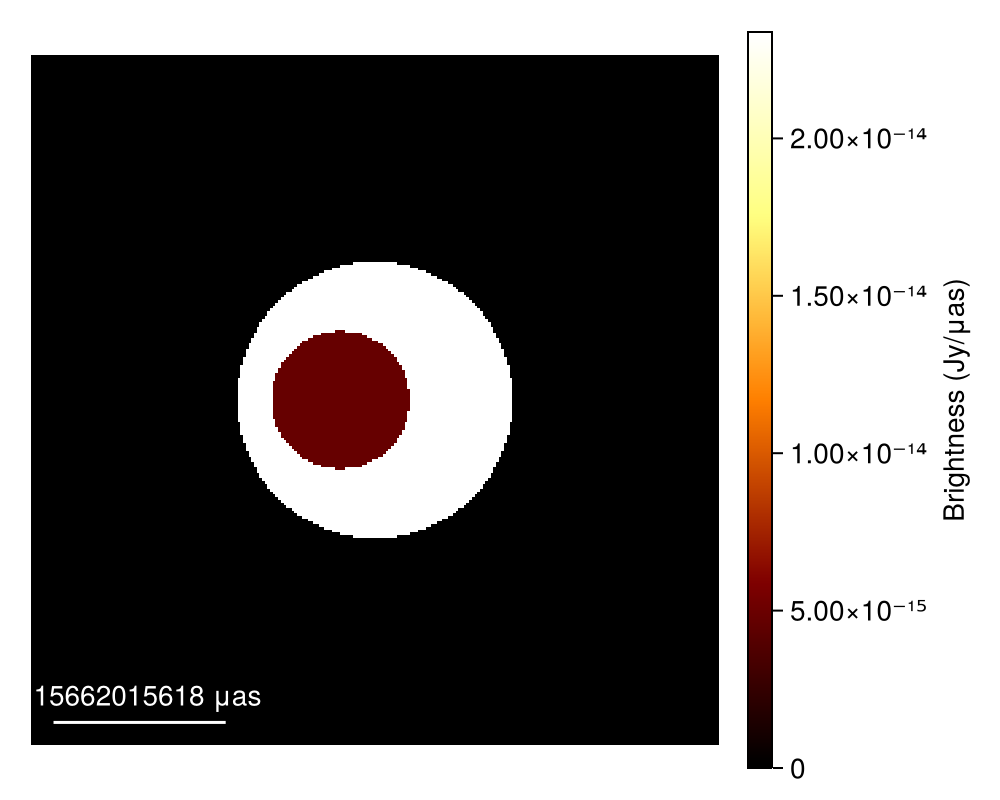

In [85]:
mdl2 = 1e10 * mdl + Cmrd.ZeroModel()
Cmrd.imageviz(Cmrd.intensitymap(mdl2, g), colormap=:afmhot, size=(500, 400)) 

### Basic model manipulations

### Stretch

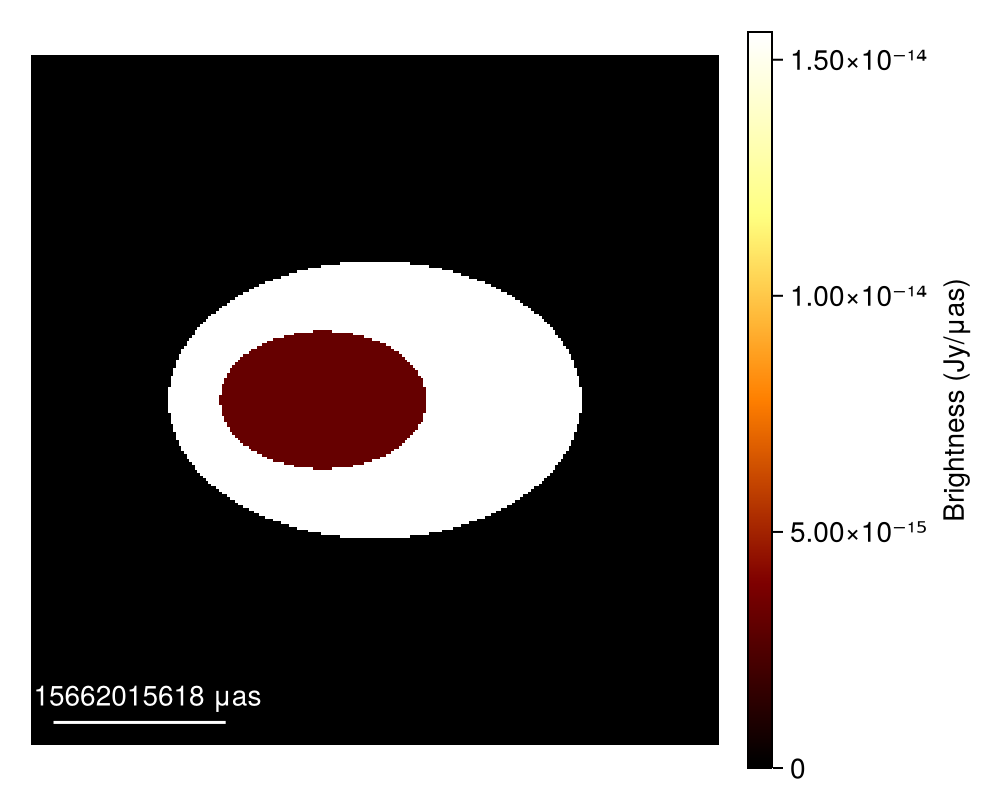

In [72]:
mdl3 = Cmrd.modify(mdl2, Cmrd.Stretch(1.5, 1.0))
Cmrd.imageviz(Cmrd.intensitymap(mdl3, g), colormap=:afmhot, size=(500, 400))

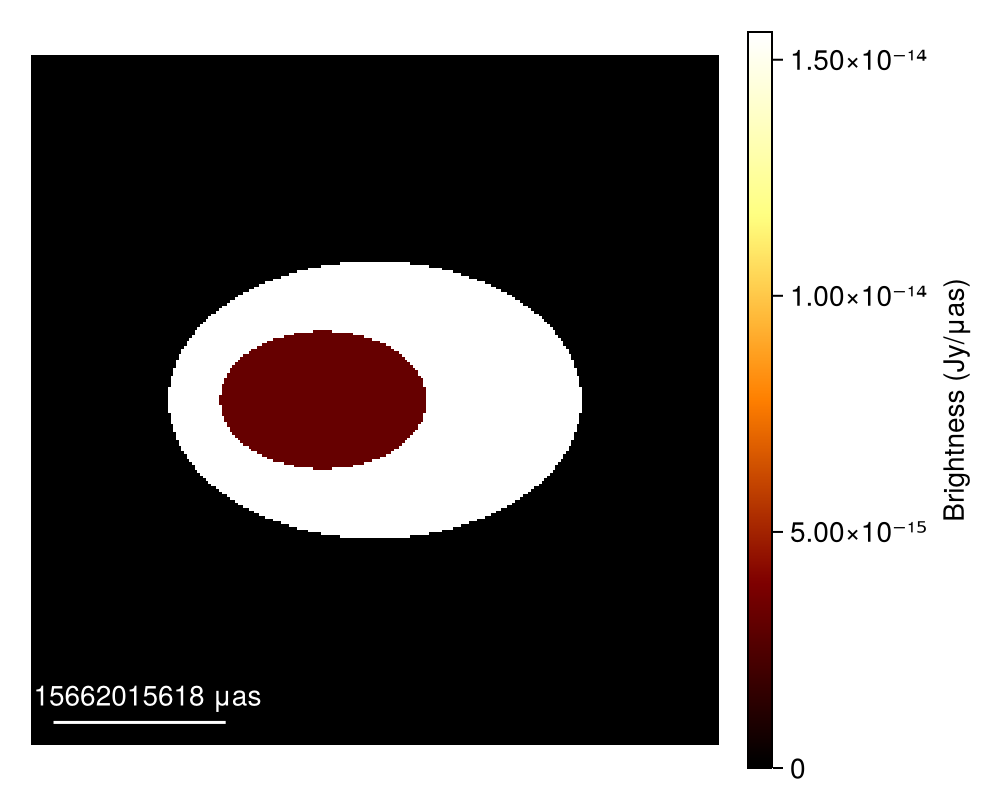

In [73]:
mdl3 = Cmrd.stretched(mdl2, 1.5, 1.0)
Cmrd.imageviz(Cmrd.intensitymap(mdl3, g), colormap=:afmhot, size=(500, 400))

### Rotation

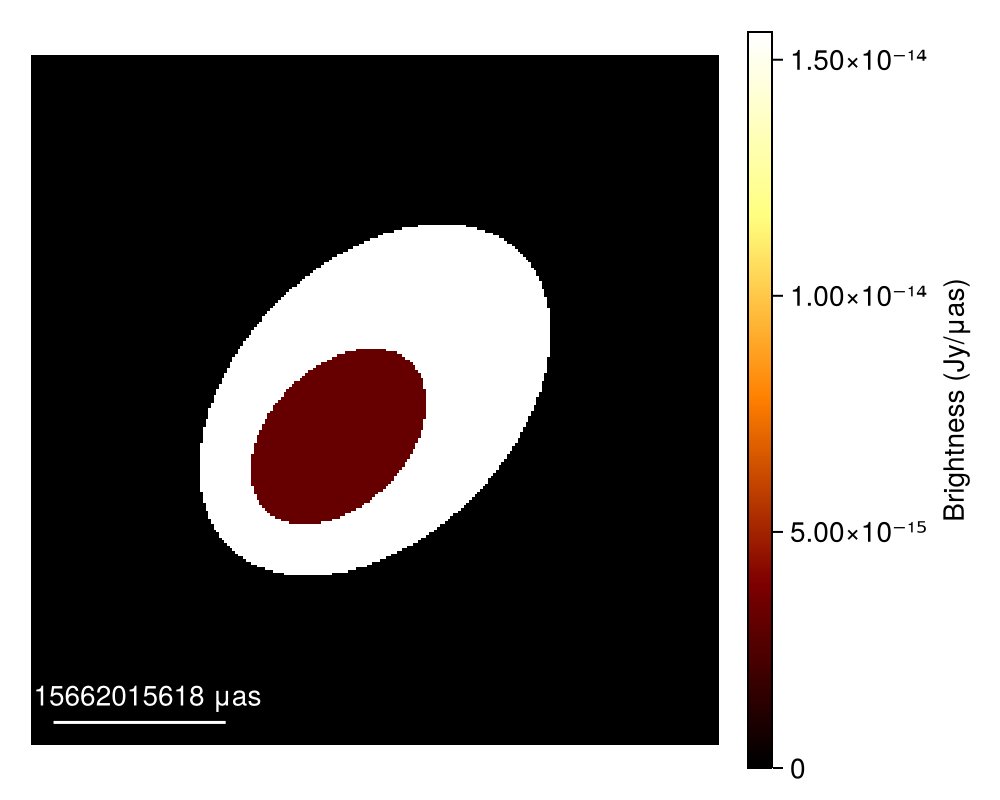

In [74]:
mdl4 = Cmrd.modify(mdl3, Cmrd.Rotate(π/4))
Cmrd.imageviz(Cmrd.intensitymap(mdl4, g), colormap=:afmhot, size=(500, 400))

### Blur

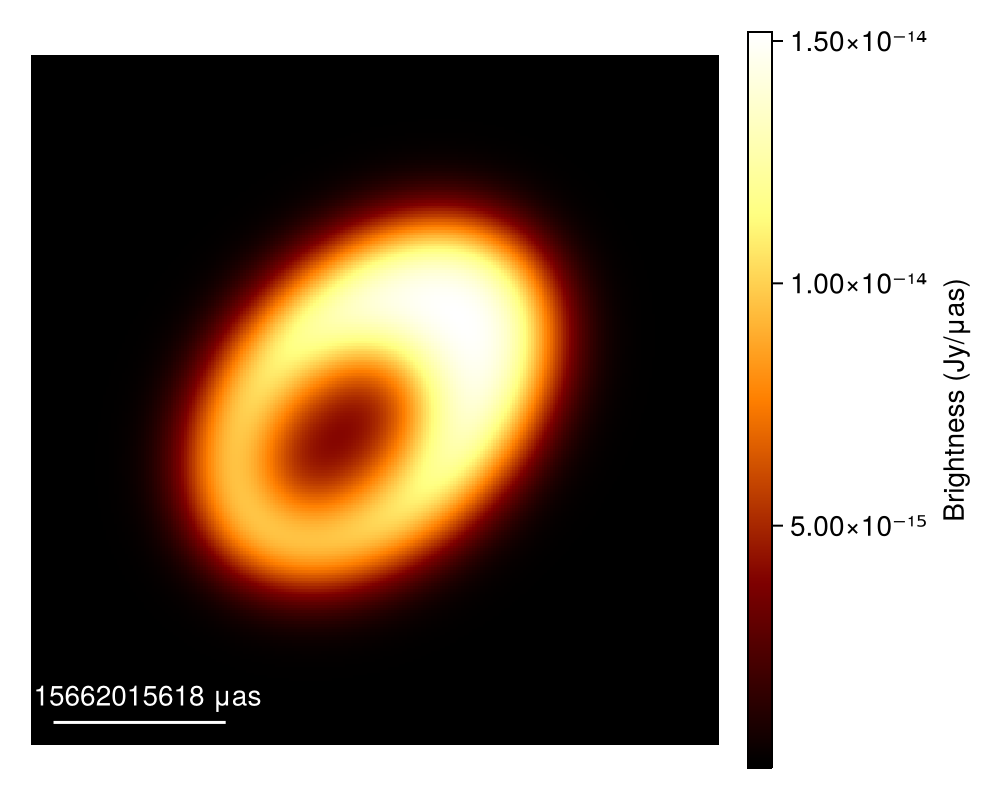

In [76]:
mdl5 = Cmrd.smoothed(mdl4, 0.5)
Cmrd.imageviz(Cmrd.intensitymap(mdl5, g), colormap=:afmhot, size=(500, 400))

### Shift

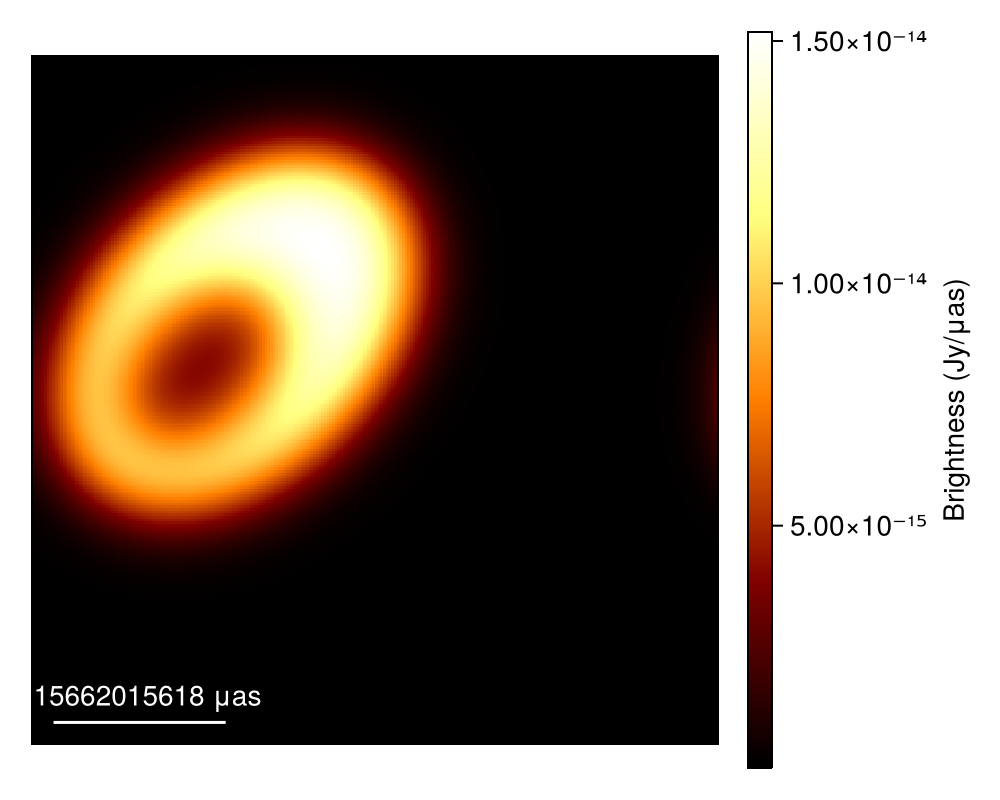

In [88]:
mdl6 = Cmrd.shifted(mdl5, 2.0, 1.0)
Cmrd.imageviz(Cmrd.intensitymap(mdl6, g), colormap=:afmhot, size=(500, 400))

### Model Composibility

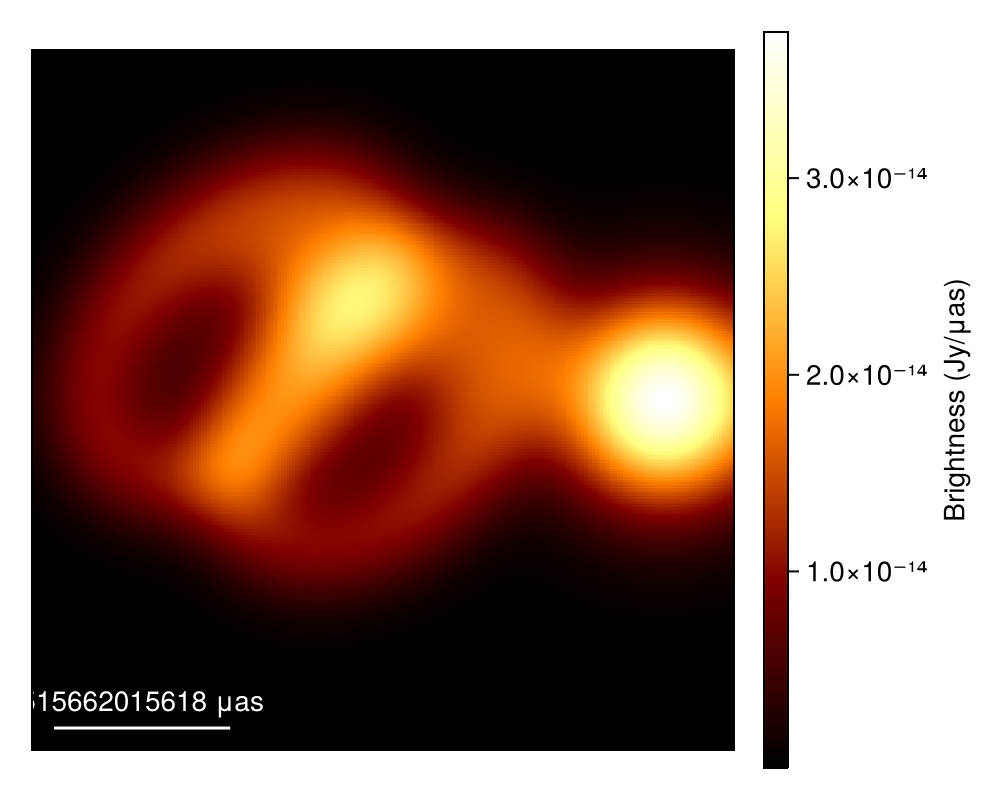

In [106]:
mdl7 = mdl6 + mdl5 + 10e9*Cmrd.shifted(Cmrd.Gaussian(),-4.0, 0.0)
Cmrd.imageviz(Cmrd.intensitymap(mdl7, g), colormap=:afmhot, size=(500, 400))